In [17]:
from utilities import *

In [18]:
############### User Configuration ###############
##################################################

datadir = "." # All ZDA files in this directory + subdirectories are loaded
selected_filename = "05_01_05" # focus for subsequent analysis

# Spatial area to investigate
y_range = [45,-2] #[10, 40]
x_range = [0,-2] #[41, 79]

# Temporal area to investigate
time_window = [40,-1]

In [19]:
############## Driver script: begin ##############
##################################################

# Load data
processed = [] # to avoid re-processing later
all_data = load_all_zda(data_dir=datadir + "/zda_targets")

# Selected data of interest
for file in all_data:
    if selected_filename in file[0]:
        selected_filename = file[0]
        
raw_data = all_data[file[0], 'data']
meta = all_data[file[0], 'meta']
rli = all_data[file[0], 'rli']
        

./zda_targets/05_01_05.zda
Number of files loaded: 1


Processing: ./zda_targets/05_01_05.zda


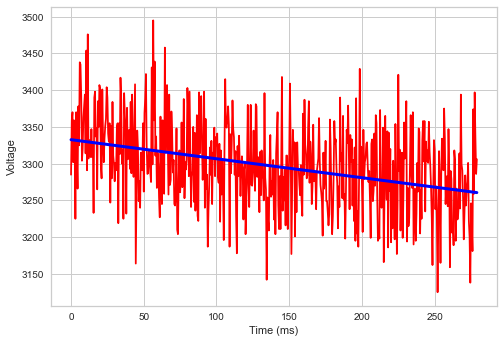

Creating file: ./output_windowed_snr/windowed_SNR05_01_05.mpeg
{'acquisition_gain': 0,
 'acquisition_onset': 100.0,
 'camera_program': 7,
 'interval_between_samples': 0.5,
 'interval_between_trials': 15,
 'location_number': 1,
 'number_of_trials': 5,
 'points_per_trace': 600,
 'raw_height': 80,
 'raw_width': 80,
 'record_number': 5,
 'reset_duration': 100.0,
 'reset_onset': 0.0,
 'shutter_duration': 530.0,
 'shutter_onset': 0.0,
 'slice_number': 5,
 'stimulation1_duration': 1.0,
 'stimulation1_onset': 150.0,
 'stimulation2_duration': 1.0,
 'stimulation2_onset': 150.0,
 'time_RecControl': b'\xae-\x97_\x00\x00\x00\x00',
 'version': 5}


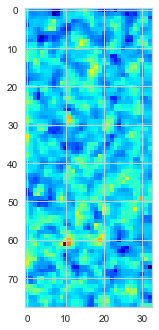

In [20]:
# Process ALL zda files into videos (this takes a long time)
for key in all_data:
    if key[1] == 'meta':
        pprint(all_data[key])
    if key[1] == 'data':
        print("Processing:", key[0])
        # avoid re-processing that was already done
        
        # cut the time window
        all_data[key] = all_data[key][:,:,:,time_window[0]:time_window[1]]
        
        if key[0] not in processed:
            correct_background(meta, all_data[key])
            processed.append(key[0])
        filtered_data = filter_temporal(meta, all_data[key])
        filtered_data = filter_spatial(meta, filtered_data)

        binned_filtered_data = create_binned_data(filtered_data, binning_factor=1)
        create_window_snr_movie(binned_filtered_data,
                                x_range=x_range,
                                y_range=y_range,
                                data_dir=datadir+"/output_windowed_snr/")
        # Images to video
        print("Creating file:", datadir + "/output_windowed_snr/windowed_SNR"+ key[0].split("/")[-1][:-4] +".mpeg")
        imageFolder2mpeg(datadir + "/output_windowed_snr", 
                        datadir + "/output_windowed_snr/windowed_SNR"+ key[0].split("/")[-1][:-4] +".mpeg", 
                        fps=30)